In [53]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

SEED = 6174
np.random.seed(SEED)

# Set the folder path for data
folder_path = "./input"

In [47]:
de_train = pd.read_parquet(f'{folder_path}/de_train.parquet')
genes = de_train.columns[5:]
id_map = pd.read_csv (f'{folder_path}/id_map.csv')

sm_lincs_id = de_train.set_index('sm_name')["sm_lincs_id"].to_dict()
sm_name_to_smiles = de_train.set_index('sm_name')['SMILES'].to_dict()

id_map['sm_lincs_id'] = id_map['sm_name'].map(sm_lincs_id)
id_map['SMILES'] = id_map['sm_name'].map(sm_name_to_smiles)

de_train

,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,AAK1,...,ZSWIM5,ZSWIM6,ZSWIM7,ZSWIM8,ZSWIM9,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.104720,-0.077524,-1.625596,-0.144545,0.143555,0.073229,-0.016823,0.101717,-0.005153,1.043629,...,0.299807,0.319123,0.179530,0.220086,-0.206053,-0.227781,-0.010752,-0.023881,0.674536,-0.453068,0.005164,-0.094959,0.034127,0.221377,0.368755
1,T cells CD4+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.915953,-0.884380,0.371834,-0.081677,-0.498266,0.203559,0.604656,0.498592,-0.317184,0.375550,...,0.091576,0.717595,1.262570,0.357003,-0.168803,-0.494985,-0.303419,0.304955,-0.333905,-0.315516,-0.369626,-0.095079,0.704780,1.096702,-0.869887
2,T cells CD8+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,-0.387721,-0.305378,0.567777,0.303895,-0.022653,-0.480681,0.467144,-0.293205,-0.005098,0.214918,...,-0.590645,-0.542832,0.225485,0.131672,-0.393695,-0.119422,-0.033608,-0.153123,0.183597,-0.555678,-1.494789,-0.213550,0.415768,0.078439,-0.259365
3,T regulatory cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.232893,0.129029,0.336897,0.486946,0.767661,0.718590,-0.162145,0.157206,-3.654218,-0.212402,...,0.760570,-0.217246,-0.203936,2.060546,0.899520,0.451679,0.704643,0.015468,-0.103868,0.865027,0.189114,0.224700,-0.048233,0.216139,-0.085024
4,NK cells,Mometasone Furoate,LSM-3349,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,False,4.290652,-0.063864,-0.017443,-0.541154,0.570982,2.022829,0.600011,1.231275,0.236739,0.338703,...,1.005788,0.106344,-0.145054,0.965736,0.248029,0.758474,0.510762,0.607401,-0.123059,0.214366,0.487838,-0.819775,0.112365,-0.122193,0.676629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,T regulatory cells,Atorvastatin,LSM-5771,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,False,-0.014372,-0.122464,-0.456366,-0.147894,-0.545382,-0.544709,0.282458,-0.431359,-0.364961,0.043123,...,0.092460,-0.960509,0.000051,-0.626368,-0.261534,-0.549987,-2.200925,0.359806,1.073983,0.356939,-0.029603,-0.528817,0.105138,0.491015,-0.979951
610,NK cells,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,-0.455549,0.188181,0.595734,-0.100299,0.786192,0.090954,0.169523,0.428297,0.106553,0.435088,...,0.883842,0.611697,-0.538152,0.047483,-0.602049,-1.236905,0.003854,-0.197569,-0.175307,0.101391,1.028394,0.034144,-0.231642,1.023994,-0.064760
611,T cells CD4+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,0.338168,-0.109079,0.270182,-0.436586,-0.069476,-0.061539,0.002818,-0.027167,-0.383696,0.226289,...,0.169480,-0.084077,0.697416,0.225507,0.063579,0.077579,-1.101637,0.457201,0.535184,-0.198404,-0.005004,0.552810,-0.209077,0.389751,-0.337082
612,T cells CD8+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,0.101138,-0.409724,-0.606292,-0.071300,-0.001789,-0.706087,-0.620919,-1.485381,0.059303,-0.032584,...,-1.149889,-0.977296,0.369929,0.625152,-0.885209,0.005951,-0.893093,-1.003029,-0.080367,-0.076604,0.024849,0.012862,-0.029684,0.005506,-1.733112


In [48]:
de_train["cell_type"].value_counts()

NK cells              146
T cells CD4+          146
T regulatory cells    146
T cells CD8+          142
B cells                17
Myeloid cells          17
Name: cell_type, dtype: int64

In [49]:
all_sm_names = de_train[de_train["cell_type"]=="B cells"]["sm_name"].to_list()
all_sm_names

['Idelalisib',
 'Crizotinib',
 'Linagliptin',
 'Palbociclib',
 'Dabrafenib',
 'Alvocidib',
 'LDN 193189',
 'R428',
 'Porcn Inhibitor III',
 'Belinostat',
 'Foretinib',
 'MLN 2238',
 'Penfluridol',
 'Dactolisib',
 'O-Demethylated Adapalene',
 'Oprozomib (ONX 0912)',
 'CHIR-99021']

In [50]:
all_de_train = de_train[de_train["sm_name"].isin(all_sm_names)]
de_train.drop(all_de_train.index, inplace=True)

all_de_train

,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,AAK1,...,ZSWIM5,ZSWIM6,ZSWIM7,ZSWIM8,ZSWIM9,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
8,B cells,Idelalisib,LSM-1205,CC[C@H](Nc1ncnc2[nH]cnc12)c1nc2cccc(F)c2c(=O)n...,False,0.394173,-0.153824,0.178232,0.566241,0.391377,0.083029,-0.068655,0.296414,-0.803112,0.441547,...,0.768612,0.189278,0.122533,0.594527,0.808755,-1.052302,-1.176587,-1.220291,-0.278944,-0.095066,1.101790,0.061803,1.406335,-0.264996,-0.119743
9,Myeloid cells,Idelalisib,LSM-1205,CC[C@H](Nc1ncnc2[nH]cnc12)c1nc2cccc(F)c2c(=O)n...,False,0.025146,0.316388,1.366885,1.301593,2.317619,0.918466,0.246278,-0.199669,1.723535,0.040367,...,1.949330,0.287791,0.366813,0.639646,1.158389,-0.902546,-1.445523,0.794772,0.428973,0.605834,0.271988,0.492231,0.354721,1.471559,-0.259483
10,NK cells,Idelalisib,LSM-1205,CC[C@H](Nc1ncnc2[nH]cnc12)c1nc2cccc(F)c2c(=O)n...,False,0.861487,-0.112313,-0.355217,0.719999,0.655865,-0.224028,0.630057,0.555941,-0.000905,-0.142188,...,-0.079062,0.426955,-0.193200,0.364747,-0.312043,0.035687,0.138060,-0.776619,-0.109832,-0.189906,0.753086,0.190892,-0.141699,-0.756510,-0.076934
11,T cells CD4+,Idelalisib,LSM-1205,CC[C@H](Nc1ncnc2[nH]cnc12)c1nc2cccc(F)c2c(=O)n...,False,0.206471,0.014638,-0.247518,0.430198,0.103020,-0.032602,-1.684403,-0.147412,0.102408,0.397979,...,0.155669,-0.343380,0.941641,-0.016951,-1.014246,-0.018902,-1.013426,-1.196254,-0.983257,1.097309,-0.090271,-1.293485,0.118196,-0.120892,-0.411331
12,T cells CD8+,Idelalisib,LSM-1205,CC[C@H](Nc1ncnc2[nH]cnc12)c1nc2cccc(F)c2c(=O)n...,False,0.046959,-0.346839,0.023478,0.485611,0.005066,0.086348,0.900016,0.518629,-1.986318,-0.062994,...,-0.064854,-0.268421,1.595225,-0.183425,-0.070003,0.017437,0.537964,-0.219895,0.376181,0.706930,-0.554368,0.035559,-0.189976,-0.145465,0.109084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,Myeloid cells,CHIR-99021,LSM-1181,Cc1cnc(-c2cnc(NCCNc3ccc(C#N)cn3)nc2-c2ccc(Cl)c...,False,0.338227,-0.431007,0.066335,-0.907600,0.973881,0.614959,0.971321,0.062272,0.275795,0.119318,...,0.818186,0.582007,-1.226835,0.024275,-0.234764,0.187125,0.800574,0.214946,-0.104931,-0.125619,-0.160210,-0.886414,-2.955785,-0.866944,-0.053017
558,NK cells,CHIR-99021,LSM-1181,Cc1cnc(-c2cnc(NCCNc3ccc(C#N)cn3)nc2-c2ccc(Cl)c...,False,-1.026443,-0.024840,0.204772,-0.861985,-2.972540,0.466931,0.803999,0.007714,-0.297989,-0.389971,...,-0.103072,-0.127083,-0.958732,3.580614,-2.565304,0.323512,1.131738,-0.064157,0.011429,0.030404,0.015837,-0.055027,-0.329874,0.327199,-0.830306
559,T cells CD4+,CHIR-99021,LSM-1181,Cc1cnc(-c2cnc(NCCNc3ccc(C#N)cn3)nc2-c2ccc(Cl)c...,False,-0.545092,0.108150,-0.355024,-1.659293,-0.613075,-0.150181,0.234538,-0.434379,0.123247,-0.205744,...,-0.431623,-0.536587,0.079784,0.087823,-0.449740,2.537207,-0.429731,-0.605248,0.304310,-0.014653,0.000120,-1.117706,-0.130162,0.001642,-0.665771
560,T cells CD8+,CHIR-99021,LSM-1181,Cc1cnc(-c2cnc(NCCNc3ccc(C#N)cn3)nc2-c2ccc(Cl)c...,False,0.342721,0.921447,-2.992502,-0.842775,-0.408755,-0.255008,0.196678,-0.017718,-0.030968,0.053769,...,-0.067000,-0.346685,-0.396402,-0.496653,0.037352,0.240196,0.302058,-0.555482,-0.009563,0.029517,0.037701,-0.257844,-1.374965,-1.202369,-0.676311


<AxesSubplot:>

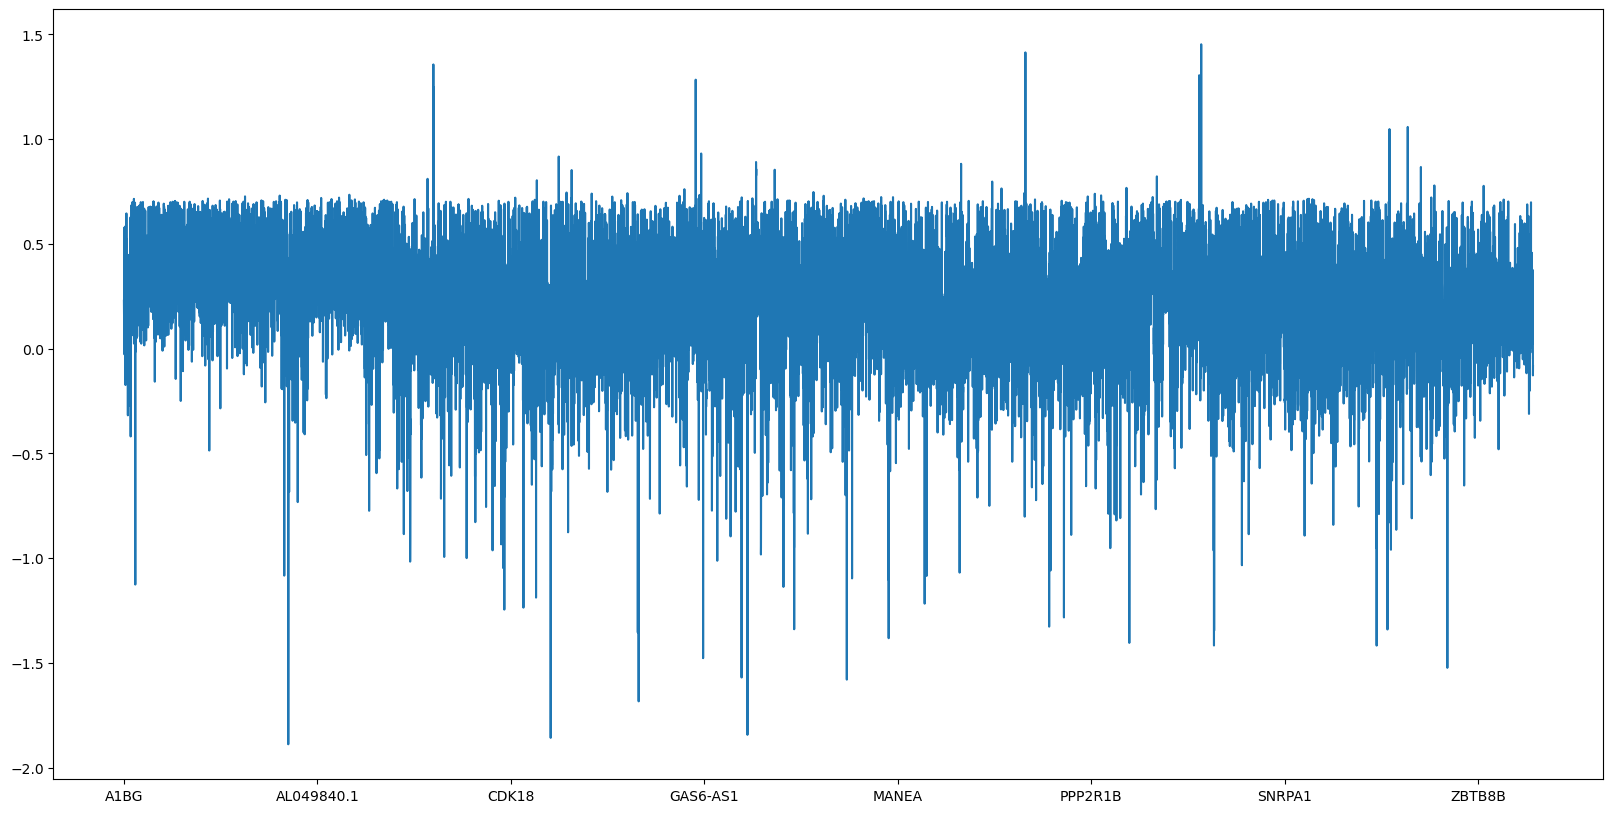

In [26]:
de_train[genes].mean(axis=0).plot(figsize=(20, 10))

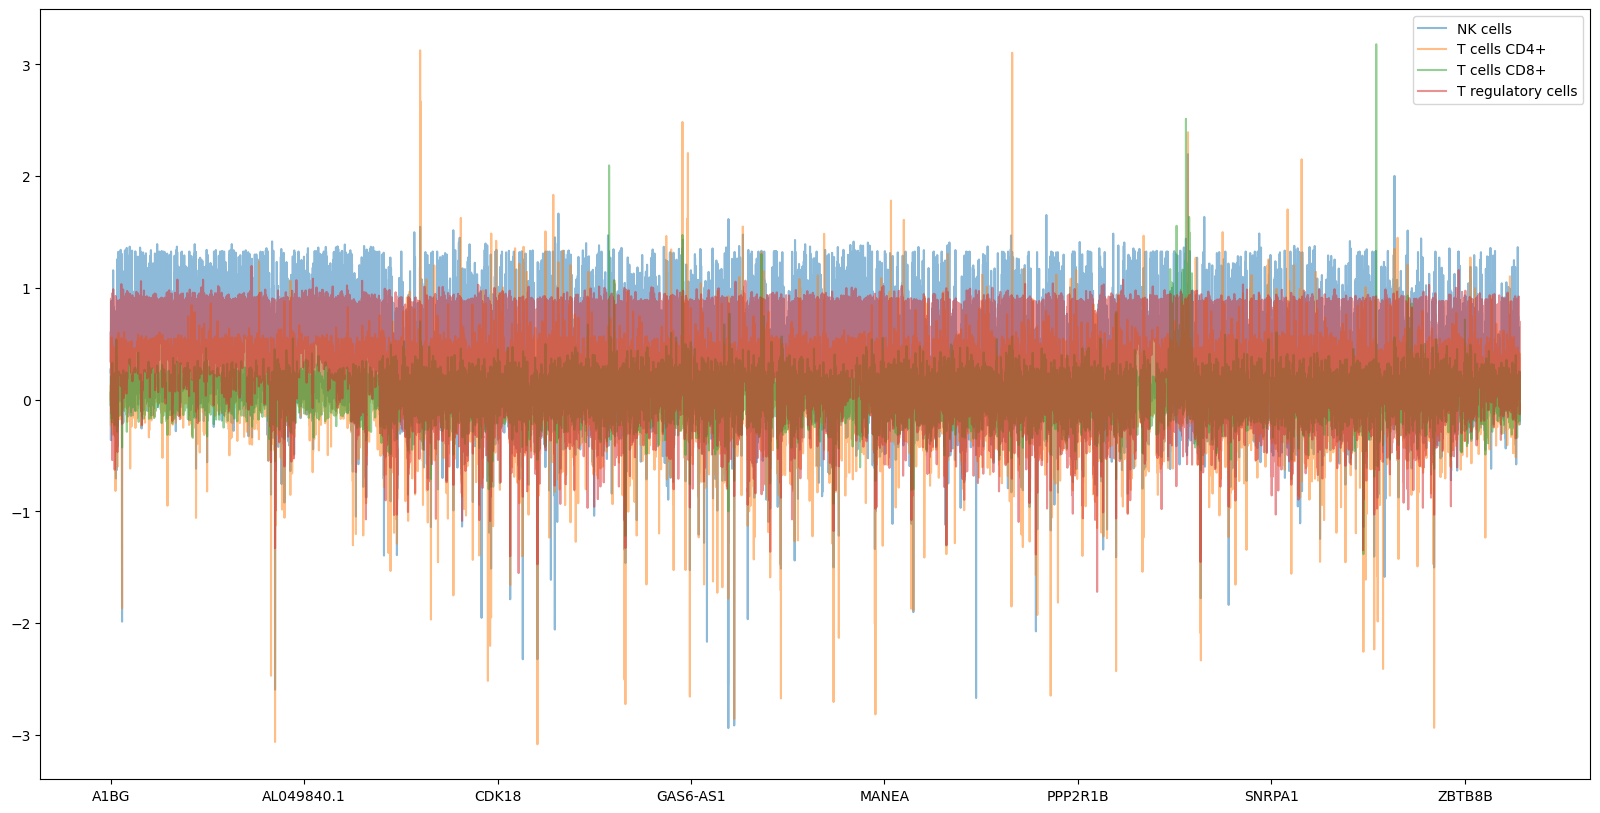

In [25]:
for cell_type in de_train["cell_type"].unique():
		de_train[de_train["cell_type"]==cell_type][genes].mean(axis=0).plot(figsize=(20, 10), label=cell_type, alpha=0.5)
		plt.legend()

<AxesSubplot:>

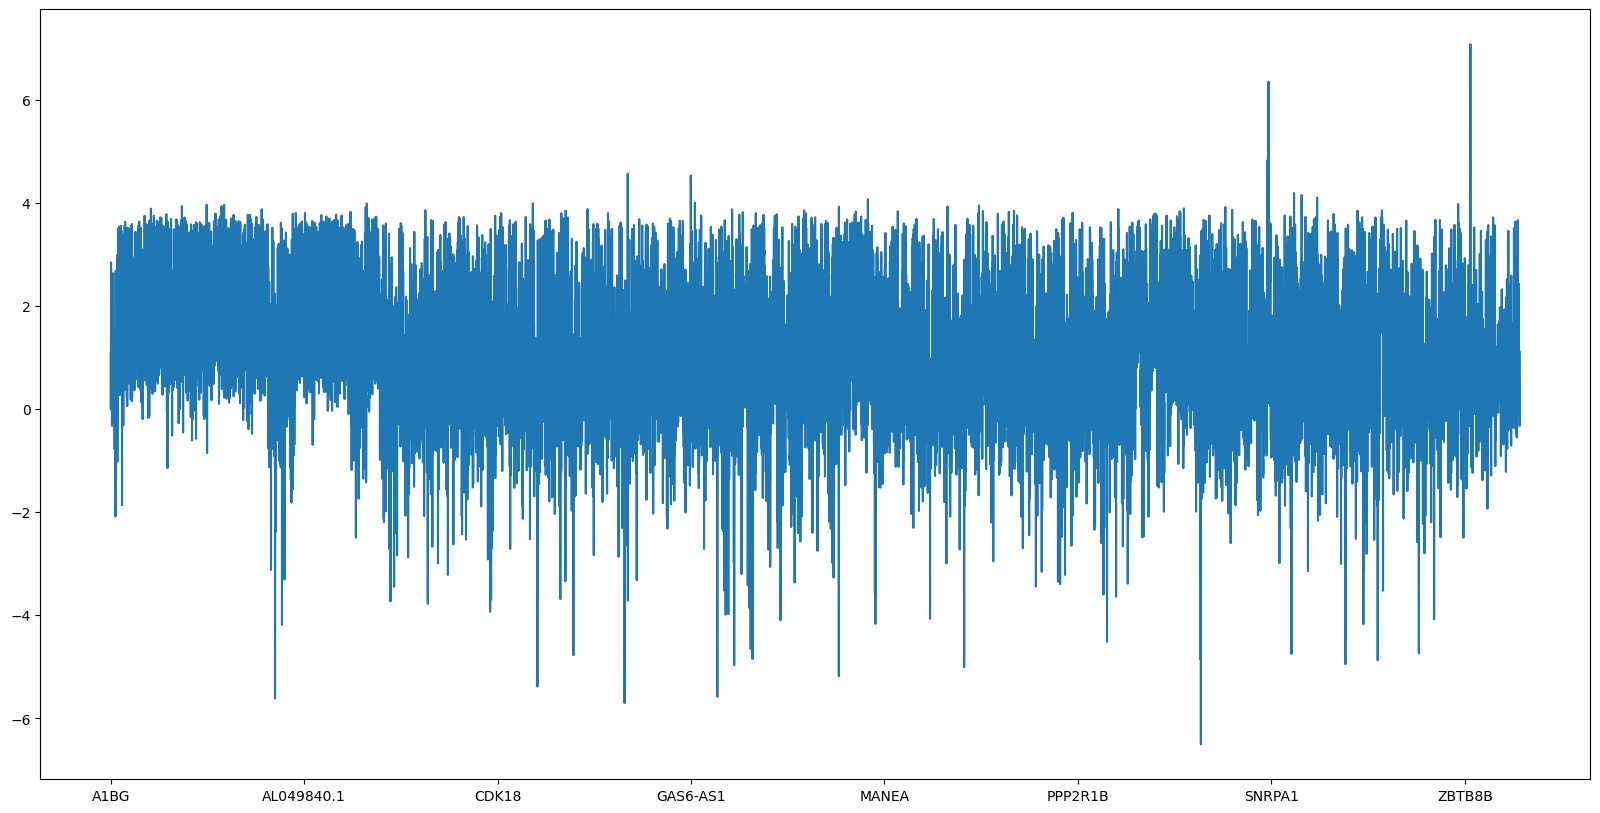

In [24]:
all_de_train[genes].mean(axis=0).plot(figsize=(20, 10))

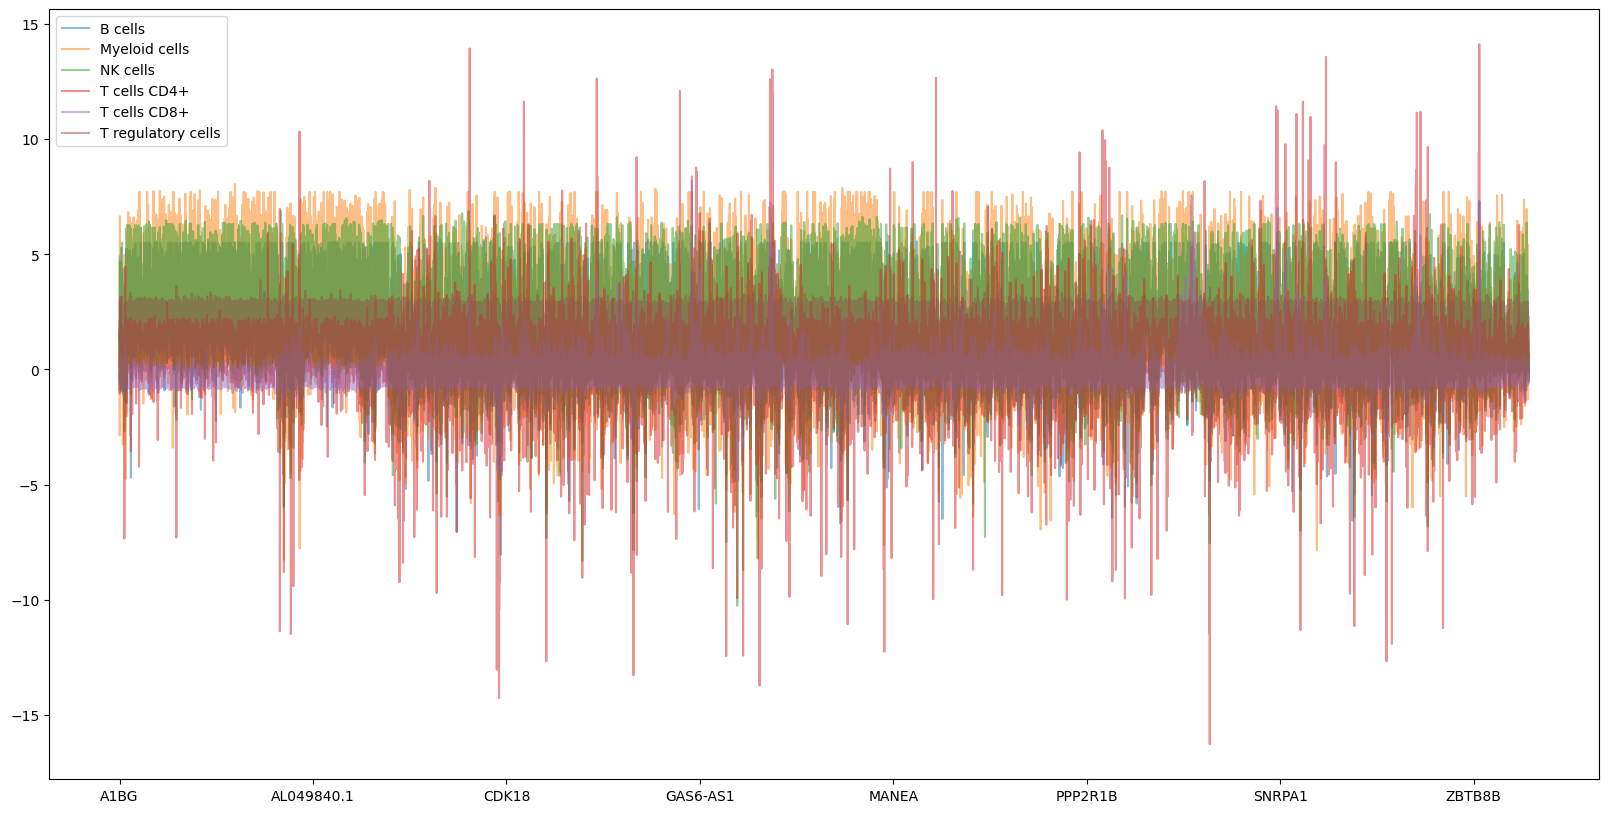

In [23]:
for cell_type in all_de_train["cell_type"].unique():
		all_de_train[all_de_train["cell_type"]==cell_type][genes].mean(axis=0).plot(figsize=(20, 10), label=cell_type, alpha=0.5)
		plt.legend()

In [28]:
cell_types = all_de_train["cell_type"].unique()
		

<AxesSubplot:>

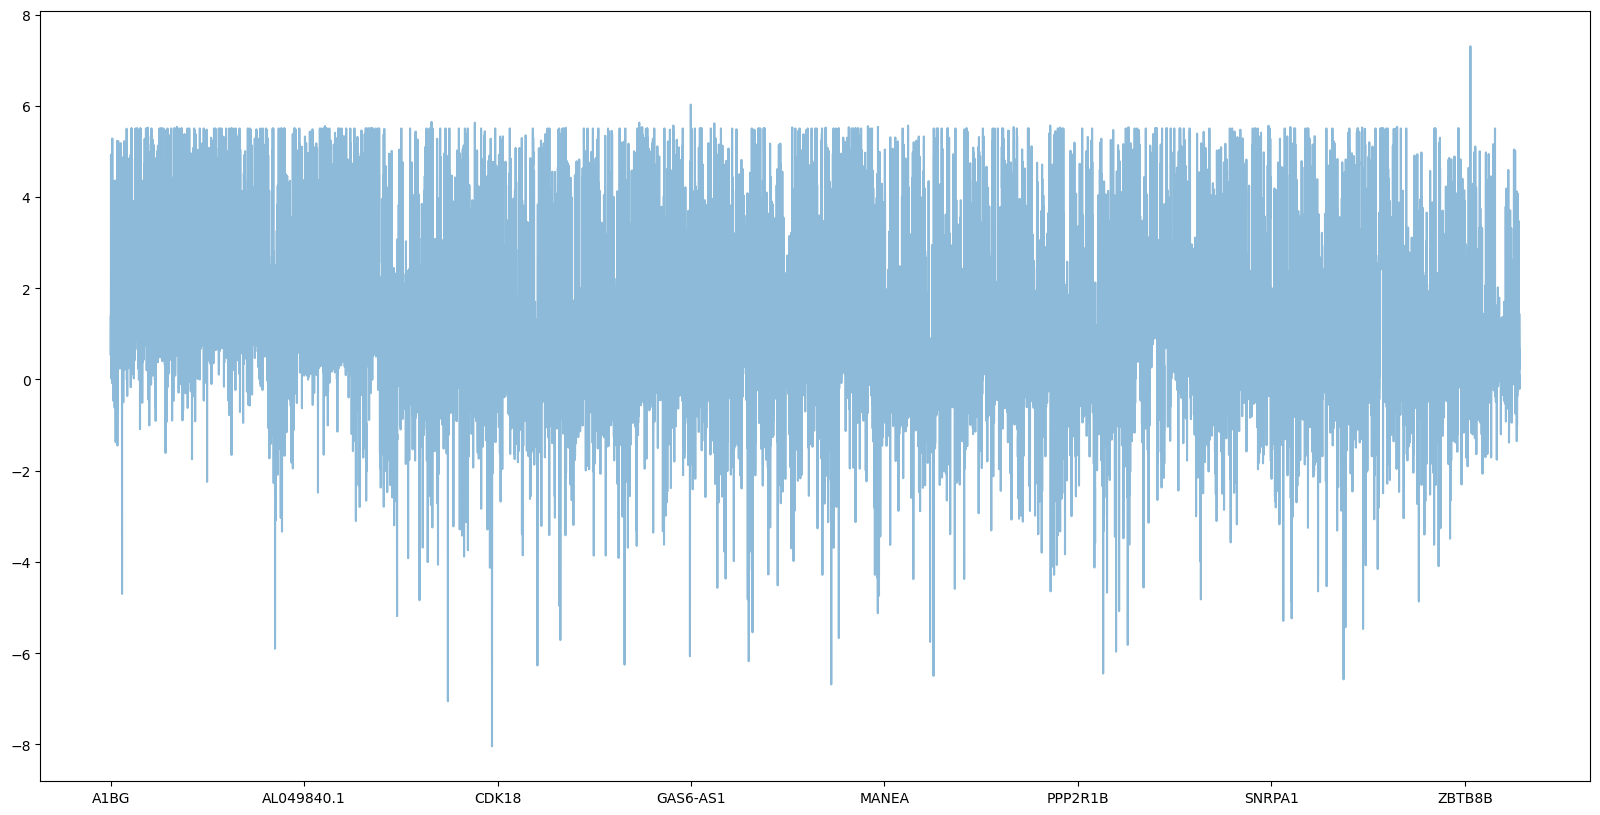

In [29]:
all_de_train[all_de_train["cell_type"]==cell_types[0]][genes].mean(axis=0).plot(figsize=(20, 10), label=cell_type, alpha=0.5)

<AxesSubplot:>

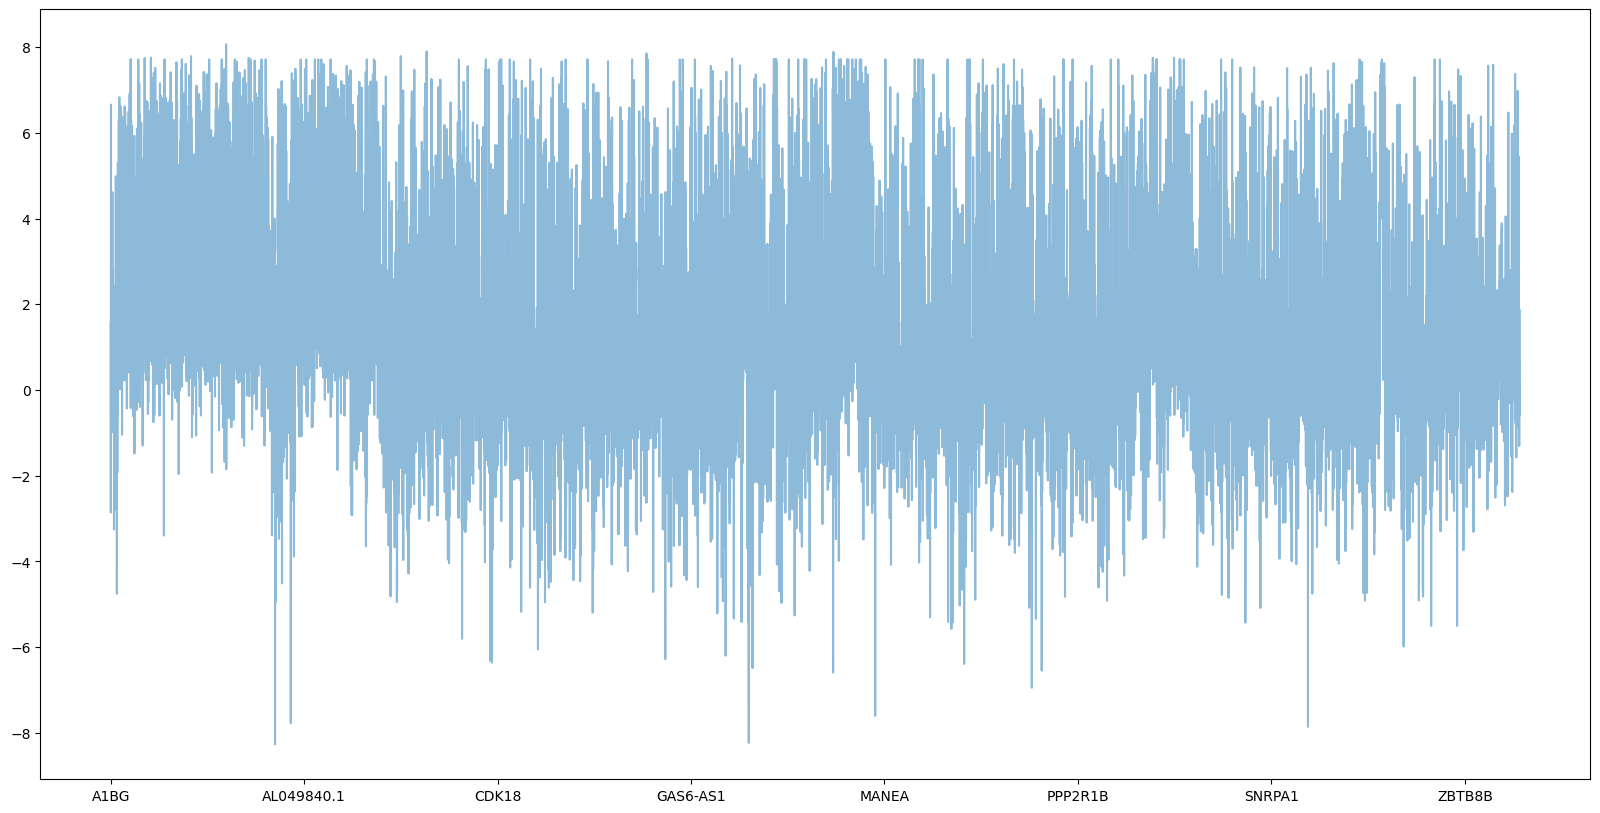

In [31]:
all_de_train[all_de_train["cell_type"]==cell_types[1]][genes].mean(axis=0).plot(figsize=(20, 10), label=cell_type, alpha=0.5)

<AxesSubplot:>

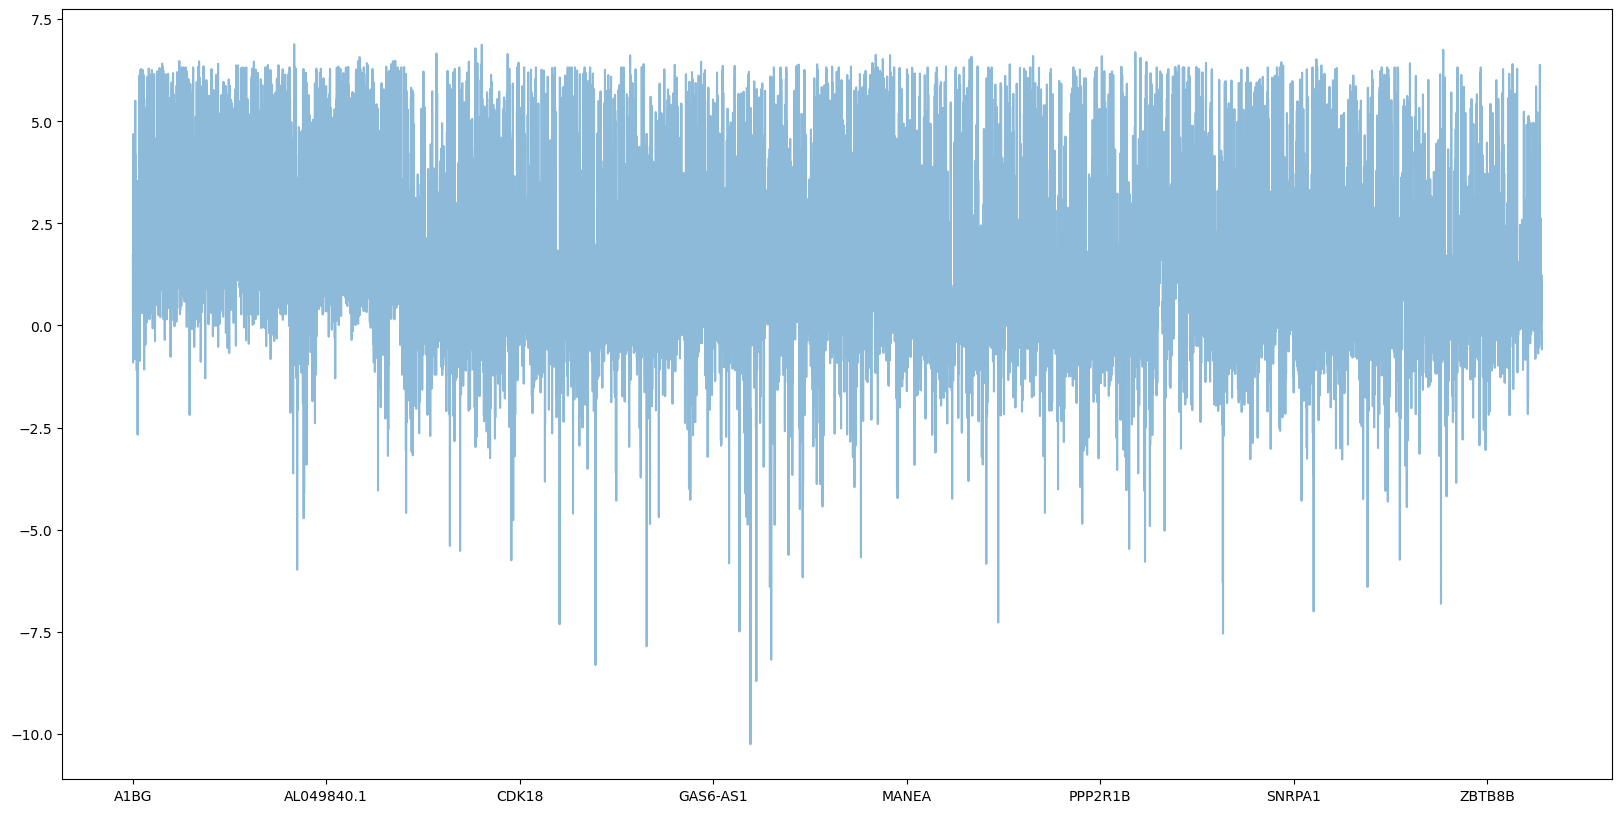

In [30]:
all_de_train[all_de_train["cell_type"]==cell_types[2]][genes].mean(axis=0).plot(figsize=(20, 10), label=cell_type, alpha=0.5)

<AxesSubplot:>

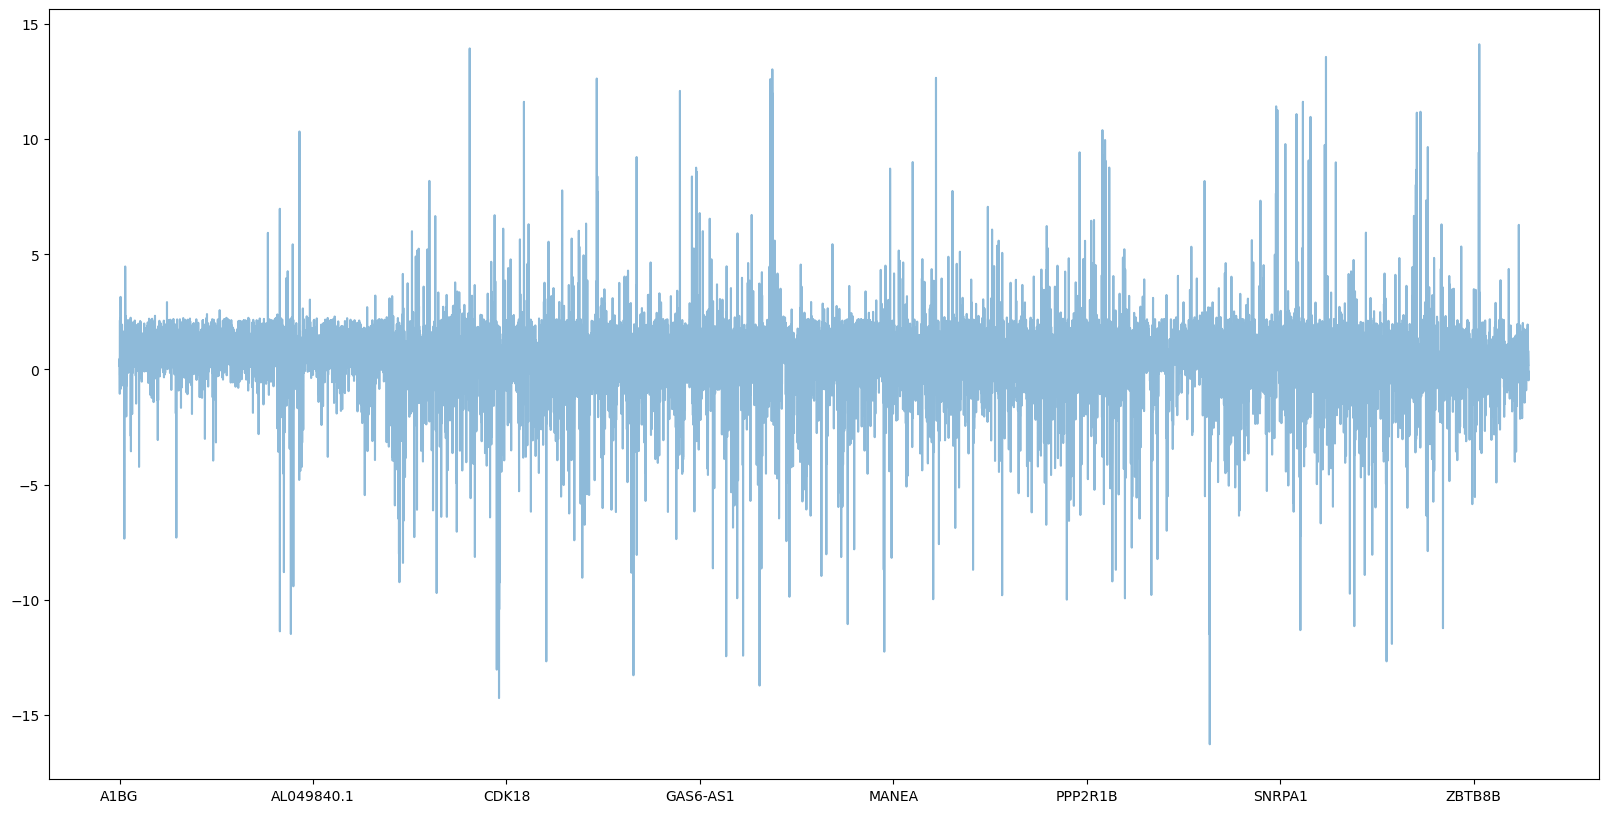

In [32]:
all_de_train[all_de_train["cell_type"]==cell_types[3]][genes].mean(axis=0).plot(figsize=(20, 10), label=cell_type, alpha=0.5)

<AxesSubplot:>

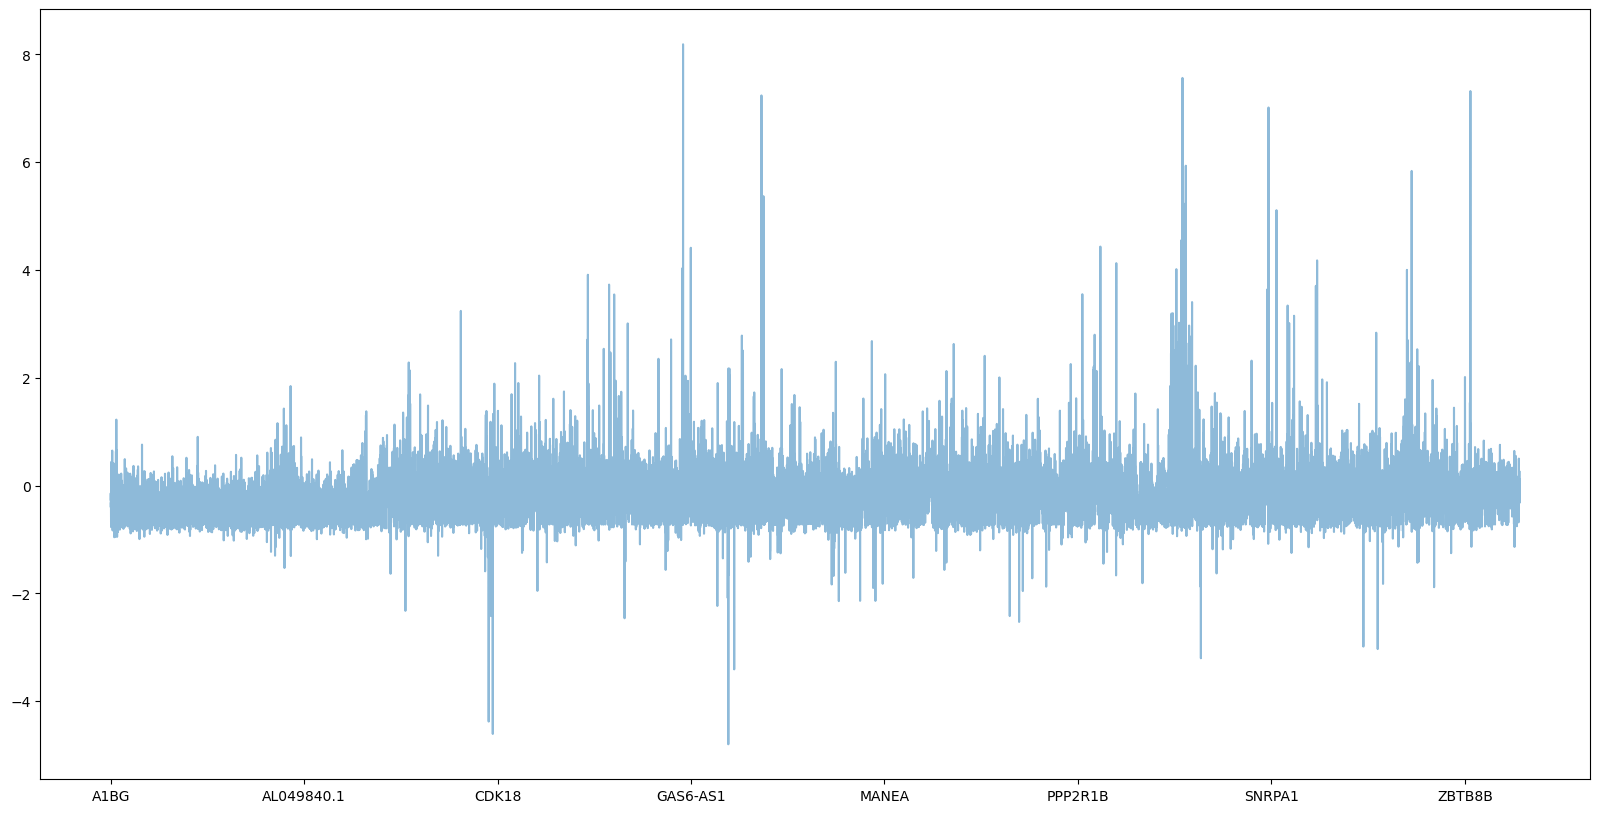

In [33]:
all_de_train[all_de_train["cell_type"]==cell_types[4]][genes].mean(axis=0).plot(figsize=(20, 10), label=cell_type, alpha=0.5)

<AxesSubplot:>

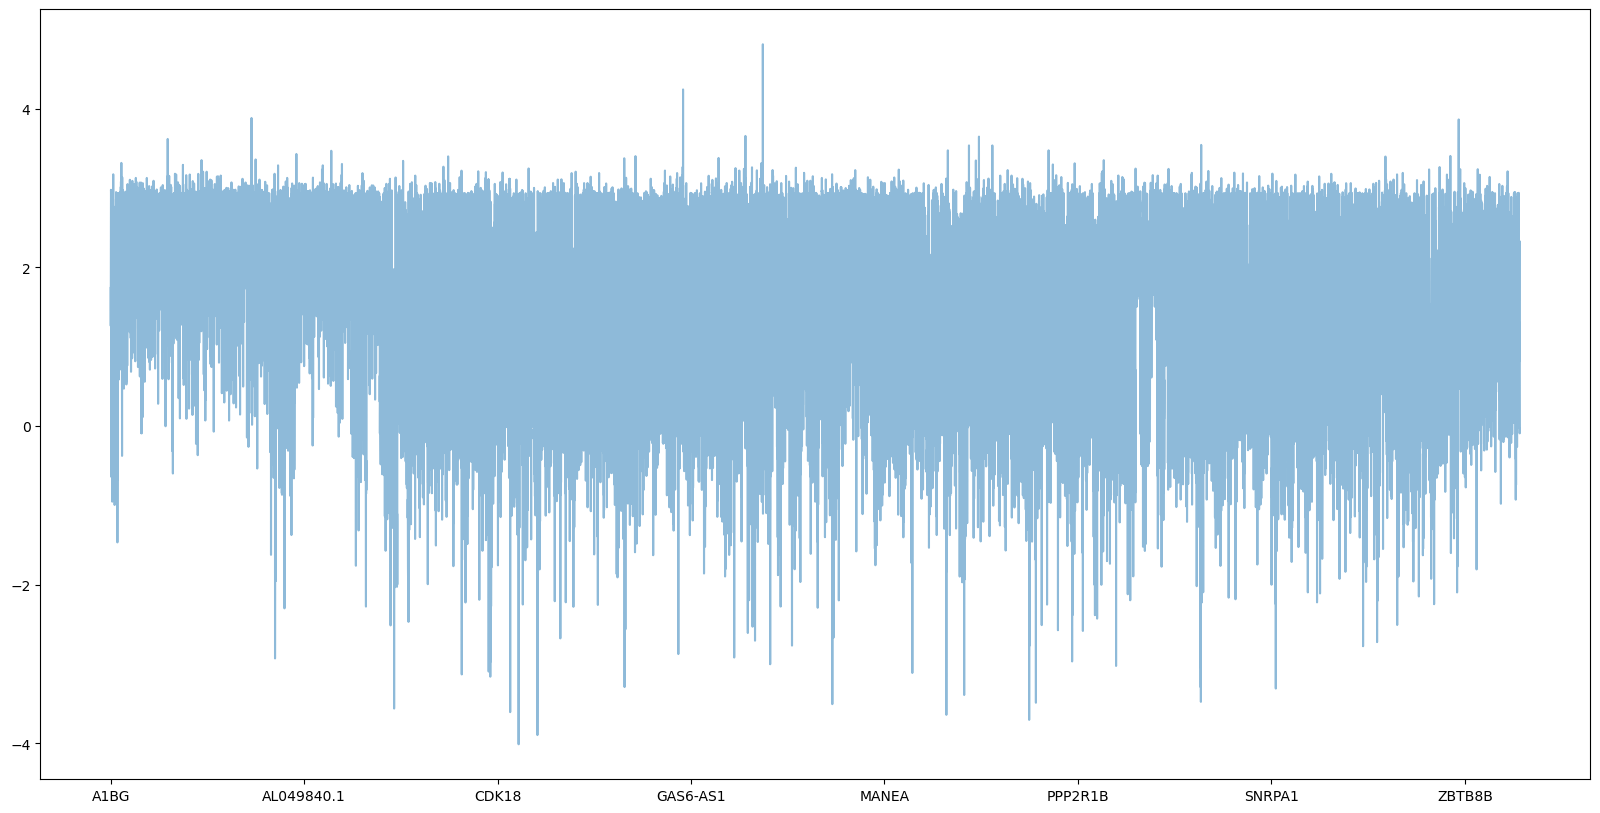

In [34]:
all_de_train[all_de_train["cell_type"]==cell_types[5]][genes].mean(axis=0).plot(figsize=(20, 10), label=cell_type, alpha=0.5)

<AxesSubplot:>

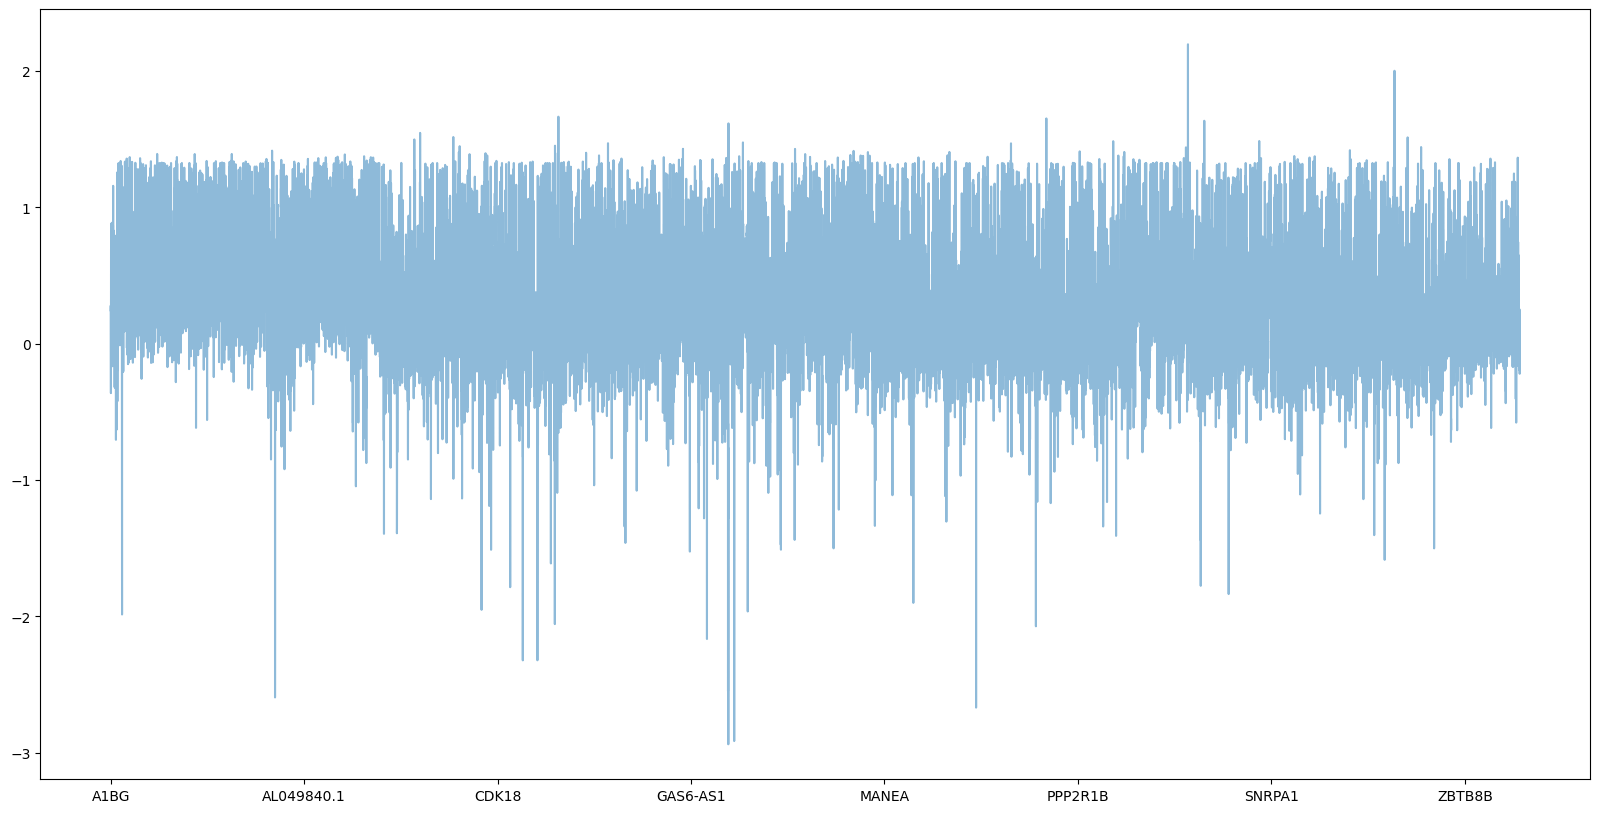

In [37]:
de_train[de_train["cell_type"]==cell_types[2]][genes].mean(axis=0).plot(figsize=(20, 10), label=cell_type, alpha=0.5)

<AxesSubplot:>

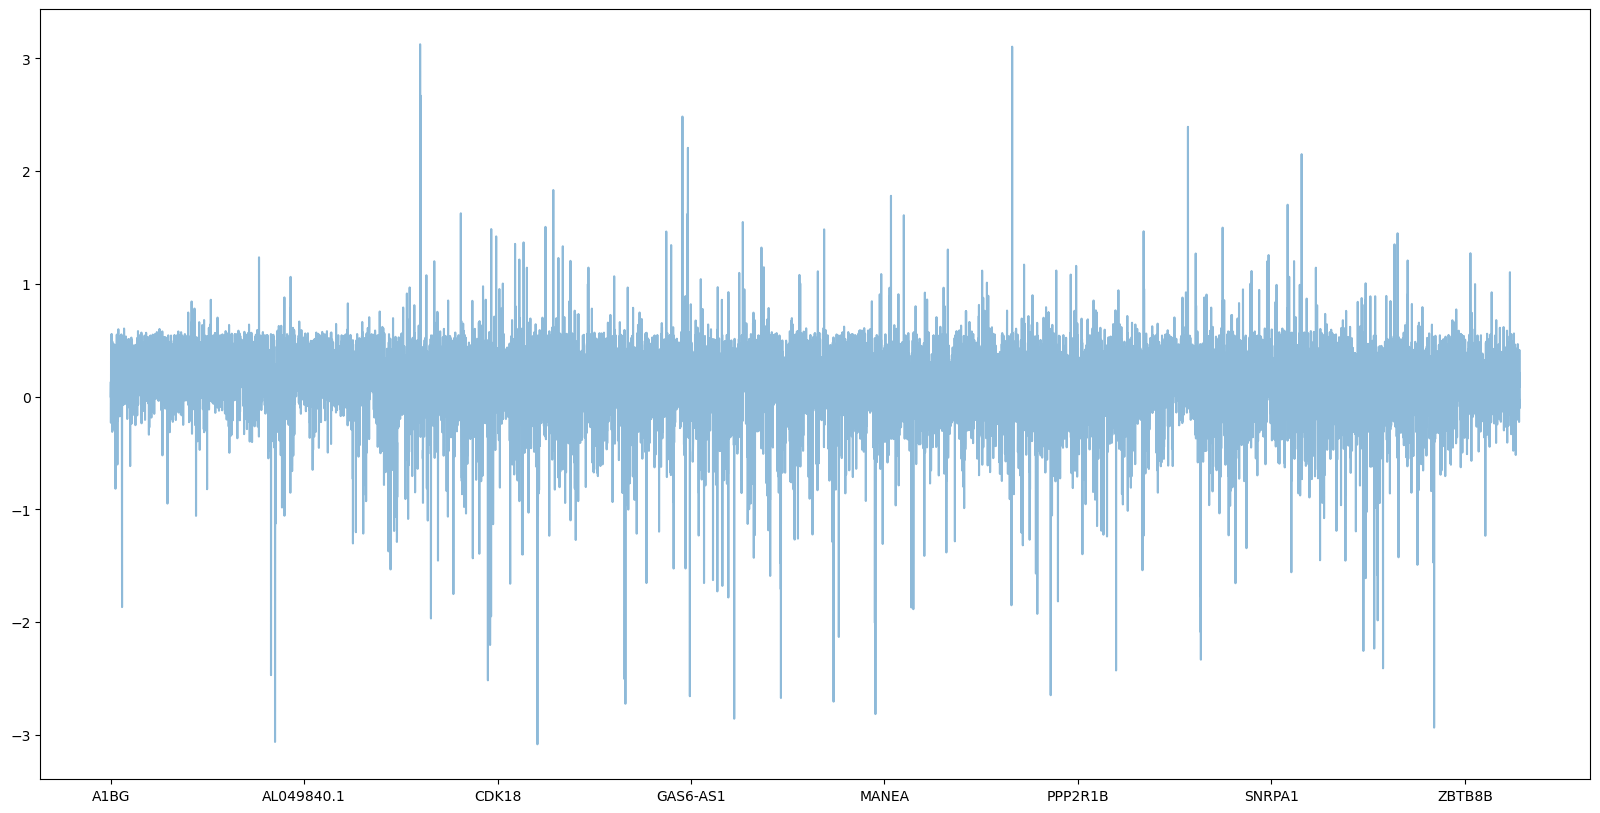

In [38]:
de_train[de_train["cell_type"]==cell_types[3]][genes].mean(axis=0).plot(figsize=(20, 10), label=cell_type, alpha=0.5)

<AxesSubplot:>

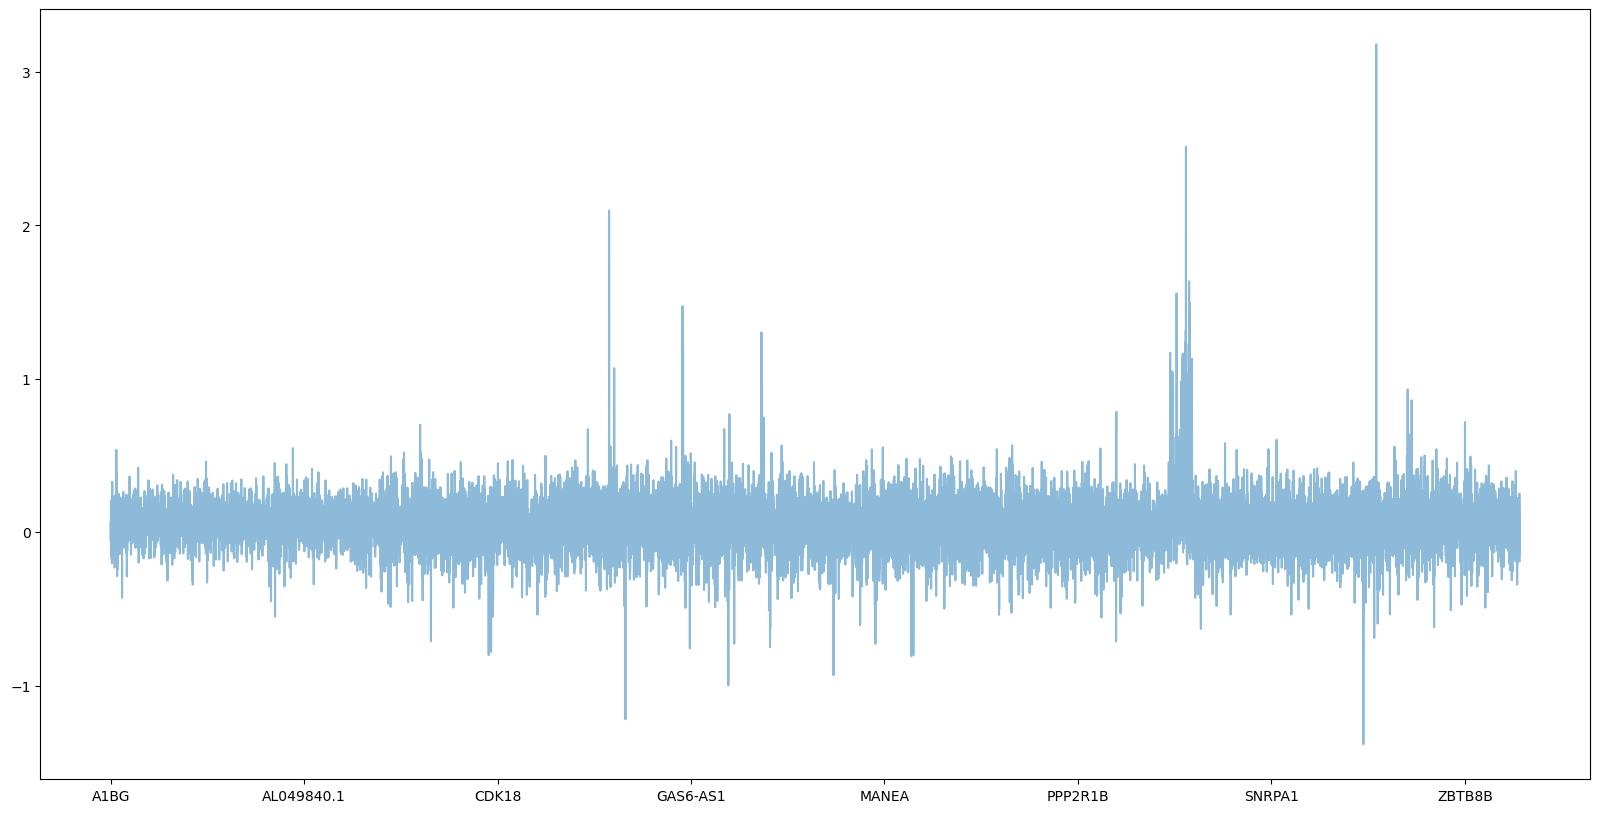

In [39]:
de_train[de_train["cell_type"]==cell_types[4]][genes].mean(axis=0).plot(figsize=(20, 10), label=cell_type, alpha=0.5)

<AxesSubplot:>

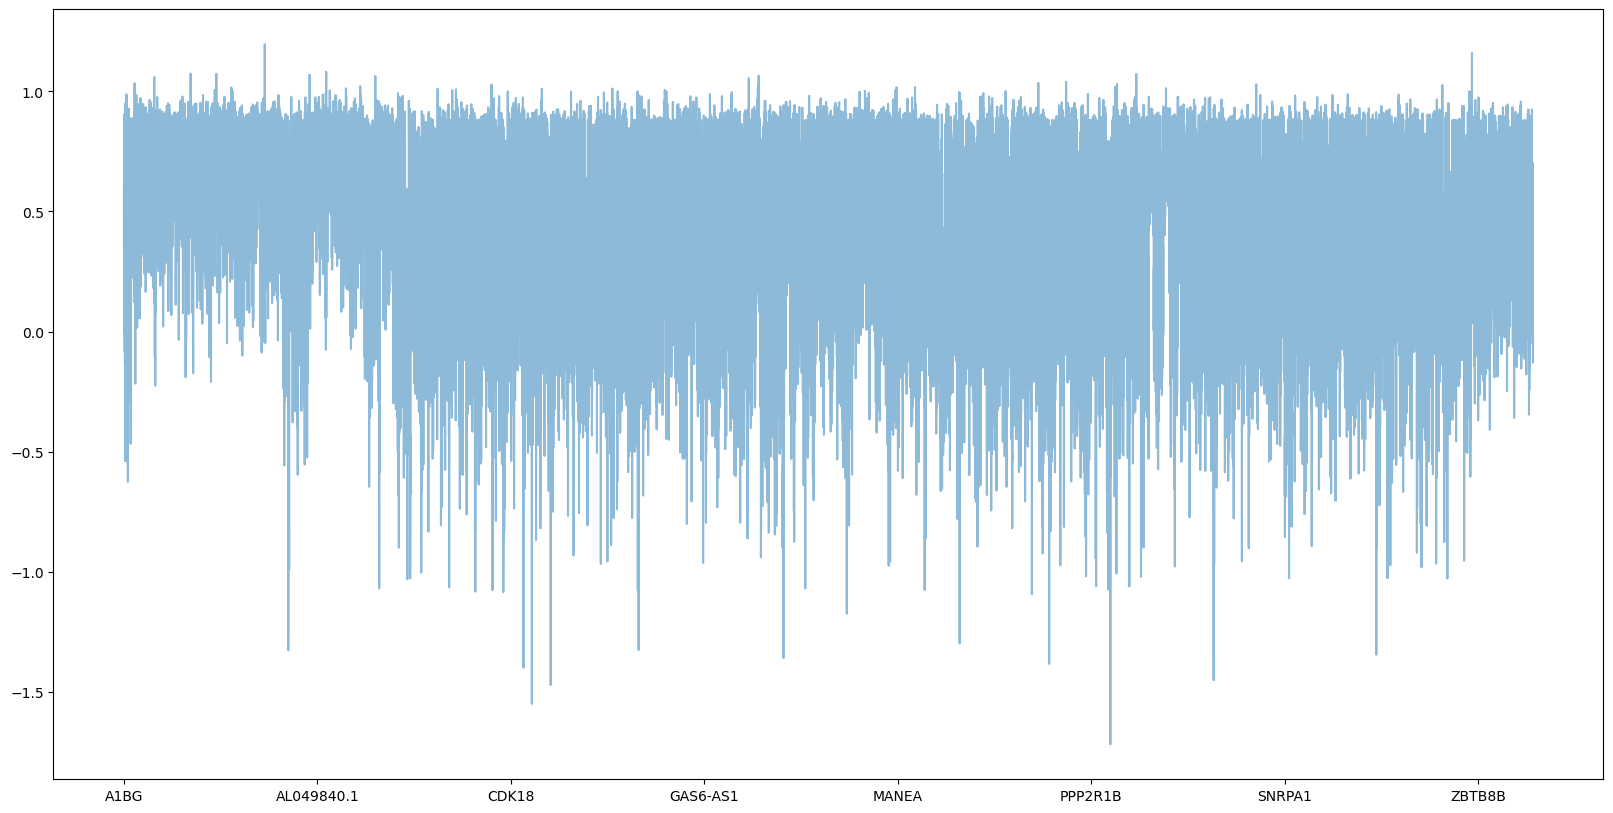

In [40]:
de_train[de_train["cell_type"]==cell_types[5]][genes].mean(axis=0).plot(figsize=(20, 10), label=cell_type, alpha=0.5)

In [41]:
cell_types[3], cell_types[4]

('T cells CD4+', 'T cells CD8+')

In [62]:
grouped_data = all_de_train.groupby('cell_type')[genes].mean().reset_index()

grouped_kmeans = KMeans(n_clusters=2, random_state=6174)
grouped_kmeans.fit(grouped_data[genes])

grouped_data["label"] = grouped_kmeans.labels_
grouped_data = grouped_data[["label", "cell_type"] + genes.to_list()]
grouped_data


,label,cell_type,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,AAK1,AAMDC,AAMP,AAR2,...,ZSWIM5,ZSWIM6,ZSWIM7,ZSWIM8,ZSWIM9,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,0,B cells,1.380890,0.530585,1.340812,1.594307,4.927551,3.613191,0.028640,0.544636,0.723079,0.541773,0.864490,0.274422,0.142226,...,3.474321,0.705327,0.251728,0.795116,0.762365,0.257778,0.674977,0.217386,1.439374,0.952903,0.581303,0.637408,0.517737,-0.207092,0.079199
1,0,Myeloid cells,1.570336,0.752564,-2.856826,0.887845,6.658911,4.034911,0.442943,0.403543,0.196285,0.710763,1.090820,0.213375,0.250989,...,5.448306,0.549584,0.232563,-0.050803,0.681702,-0.270423,-0.103318,-1.307952,-0.166312,1.883588,0.612681,-0.583563,-0.427938,-0.292768,-0.067723
2,0,NK cells,1.726861,1.391056,-0.384683,-0.909542,0.735264,4.687871,0.460742,1.023145,0.046517,0.173825,0.629420,0.455910,0.501272,...,2.596725,1.005501,-0.155756,0.490974,0.153477,0.511199,0.462575,0.388045,0.784062,0.945736,1.232050,0.106880,0.600556,-0.585519,-0.156448
3,1,T cells CD4+,0.160548,0.469133,-0.074140,-1.055539,0.006779,2.138308,-0.247477,0.669044,0.630691,-0.378856,2.231946,1.551787,0.481106,...,0.404600,1.952985,0.087242,1.440086,0.029745,1.231267,0.601618,0.150675,0.811554,0.616685,0.330778,0.181473,0.175703,-0.472213,-0.099220
4,1,T cells CD8+,-0.259045,-0.142500,-0.402029,-0.313932,-0.436765,-0.769503,-0.118564,0.039057,-0.710979,0.403962,0.442151,0.392797,-0.120088,...,-0.645910,-0.036314,0.499977,-0.317747,-0.194774,0.135679,0.029111,-0.293163,-0.188252,0.014929,-0.223888,0.110891,-0.155235,-0.318527,0.253286
5,0,T regulatory cells,1.740391,1.263407,2.306707,2.578485,2.978225,2.920715,0.274367,1.225981,0.012020,-0.642217,0.641965,0.019581,0.823498,...,2.940152,0.805226,0.448096,0.586162,0.822820,-0.018877,1.311463,0.817281,1.549286,2.184906,2.333129,1.334974,0.791717,-0.092324,-0.028916


In [42]:
row_kmeans = KMeans(n_clusters=50, random_state=0)
row_kmeans.fit(de_train[genes])

row_kmeans.labels_

array([47,  1, 16, 23, 27, 32, 47, 46,  1,  1, 48, 16, 28, 40, 16, 46, 47,
        1, 16,  1, 28, 47,  1,  1, 47,  1, 16, 16, 47, 47, 47, 23, 47, 40,
       47, 46, 28, 40, 16, 23, 47,  1, 23, 23, 47,  1, 23, 16,  1,  1, 48,
        1, 18, 14, 33,  3, 28,  1, 47, 46, 16,  1,  1,  7, 16,  1,  1, 16,
        1,  1, 23,  1, 16,  1,  1, 16, 47,  1, 16,  1,  9, 13,  4,  4, 21,
       29,  3, 34,  1,  1,  1, 16, 22,  8, 12, 10, 36, 36, 16, 16,  1,  1,
       47,  7, 18, 14,  3, 47, 26, 46, 15, 30, 11, 23, 16, 16, 16,  1, 16,
       28, 47, 16, 23, 28, 47, 47, 46, 16,  1,  1,  1, 38, 24, 44, 44, 22,
       39, 25,  1,  1,  1,  7, 40, 40,  1, 47,  1,  1, 23,  1, 47,  1, 16,
        1, 47,  1, 16, 16, 47, 40, 16, 15, 28, 40, 16, 23, 28,  1,  1, 23,
       28, 45, 23, 47, 28, 47, 16,  1, 47, 41, 44,  3, 47,  1, 23, 16,  1,
        1,  1, 47, 27, 32, 16, 31, 47, 40, 47, 15, 47,  1, 16, 23, 47,  1,
       16,  1, 47,  1, 16, 47, 47, 40, 16, 15, 16,  1,  1,  1,  1,  1, 47,
       47, 16,  1,  1,  1

In [43]:
genes_kmeans = KMeans(n_clusters=50, random_state=0)
genes_kmeans.fit(de_train[genes].T)

genes_kmeans.labels_

array([ 2, 23,  2, ..., 20, 29,  1], dtype=int32)